In [1]:
import numpy as np
import pandas as pd
import pandas_ta as ta
import yfinance as yf
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# 确保‘-’号显示正常
mpl.rcParams['axes.unicode_minus']=False
# 确保中文显示正常
mpl.rcParams['font.sans-serif'] = ['SimHei']  

### 1. Collect Data

In [6]:
# Set up the ticker and the date range
ticker_symbol = "META"
start_date = "2021-01-01"
end_date = datetime.datetime.now().strftime('%Y-%m-%d')

# Fetch the data
stock_data = yf.download(ticker_symbol,start=start_date, end=end_date)
stock_data.tail(6)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-28,316.880005,326.200012,314.250000,325.480011,325.480011,39220300
2023-07-31,323.690002,325.660004,317.589996,318.600006,318.600006,25799600
2023-08-01,317.540009,324.140015,314.660004,322.709991,322.709991,22817900
2023-08-02,318.000000,318.390015,310.649994,314.309998,314.309998,20461100
2023-08-03,309.929993,315.950012,309.929993,313.190002,313.190002,15180200
2023-08-04,314.959991,318.410004,310.200012,310.730011,310.730011,17600200


In [7]:
# Calculate SMA and CCI
stock_data["SMA_5"] = ta.sma(stock_data['Close'], length=5)
stock_data["CCI_20"] = ta.cci(stock_data['High'], stock_data['Low'], stock_data['Close'], length=20)

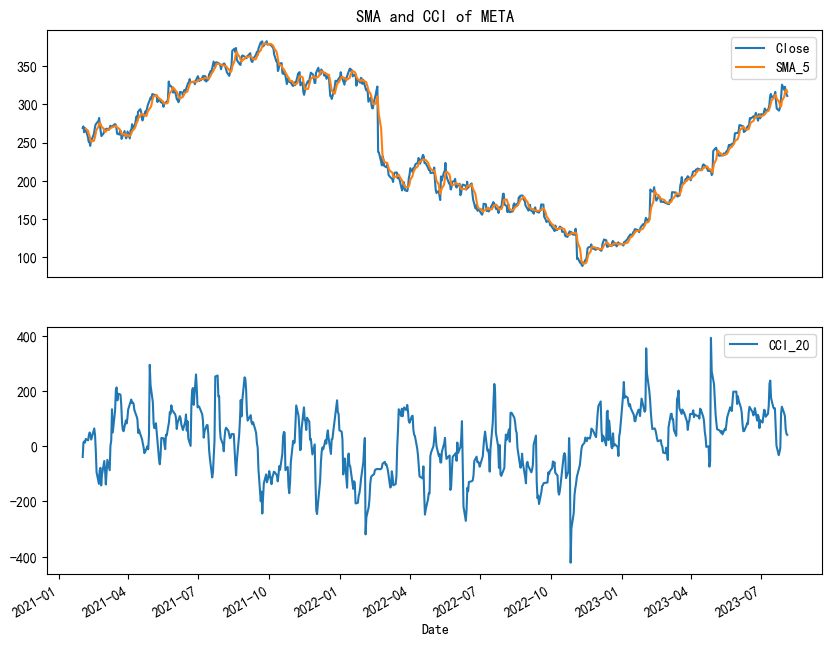

In [9]:
# Plot sma and cci of META
plt.subplot(2,1,1)
plt.title("SMA and CCI of META")
plt.gca().axes.get_xaxis().set_visible(False)
stock_data['Close'].plot(figsize = (10,8))
stock_data['SMA_5'].plot(figsize=(10,8))
plt.legend()
plt.subplot(2,1,2)
stock_data['CCI_20'].plot(figsize = (10,8))
plt.legend()
plt.show()